# Домашнее задание к лекции "Корреляция и корреляционный анализ"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

Описание датасета water.csv
- location: биноминальный признак, указывающий расоложение города (South, North)
- town: название города
- mortaliby: среднегодовая смертность на 100_000 населения
- hardness: концентрация кальция в воде (частей на миллион)

In [2]:
df = pd.read_csv('stat_datas/water.csv', index_col='Unnamed: 0')
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.4+ KB


In [9]:
df.groupby(['location']).count()

,town,mortality,hardness
location,,,
North,35,35,35
South,26,26,26


In [12]:
df.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


<Axes: xlabel='mortality', ylabel='Count'>

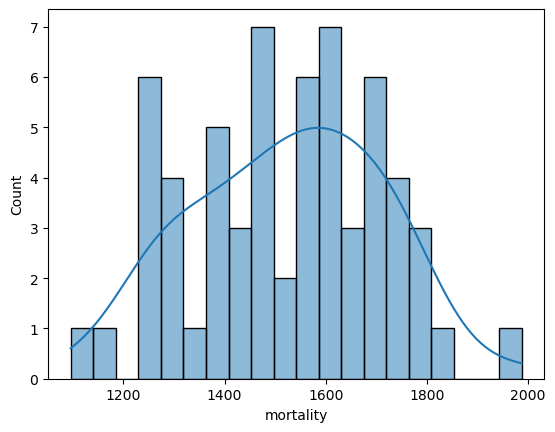

In [60]:
sns.histplot(df, x='mortality', bins=20, alpha=0.5, kde=True)

<Axes: xlabel='hardness', ylabel='Count'>

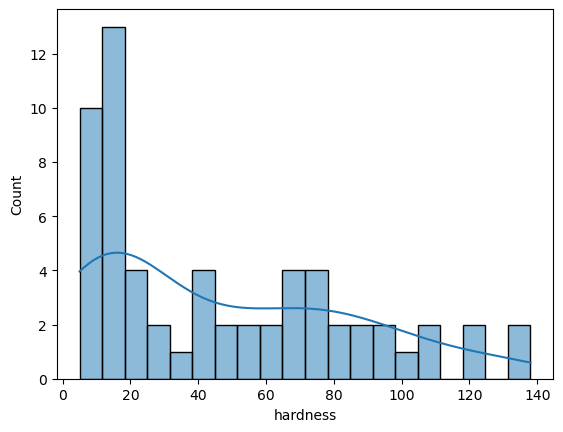

In [59]:
sns.histplot(df, x='hardness', bins=20, alpha=0.5, kde=True)

**Выводы:**
- Датасет включает 61 запись по 4 признакам.
- Пропущенные значения отсутствуют.
- Распределение значений смертности отдаленно напоминает нормальное, имеются три выброса.
- Распределение значений концентрации кальция в воде не норммальное, на хвосте тоже есть два ваброса.

## Задание 1.
### **Гипотеза:** Между жесткостью воды и средней годовой смертностью есть определенная связь

#### Строим точечный график

<Axes: xlabel='hardness', ylabel='mortality'>

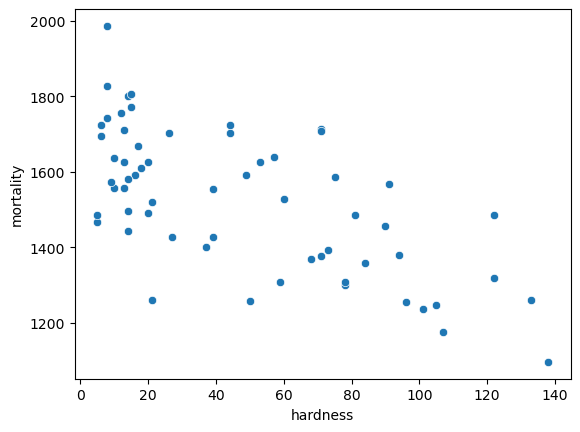

In [65]:
sns.scatterplot(data=df, x='hardness', y='mortality')

**Вывод:** Визуально отмечается обратная связь между признаками

#### Рассчитываем коэффициенты корреляции Пирсона и Спирмена

In [62]:
# Коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [64]:
# Коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


**Вывод:** Значения коэффициентов корреляции подтверждают наличие средней обратной связи между признаками. Учитывая наличие выбросов и ненормальное распределение значений празнаков, более реальным является значение коэффициента корреляции Спирмена.

#### Строим модель линейной регрессии

In [66]:
X = df[['hardness']]
y = df['mortality']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
lm.coef_

array([-3.385019])

In [71]:
lm.intercept_

1685.5141389051855

In [74]:
y_pred = lm.predict(X_test)

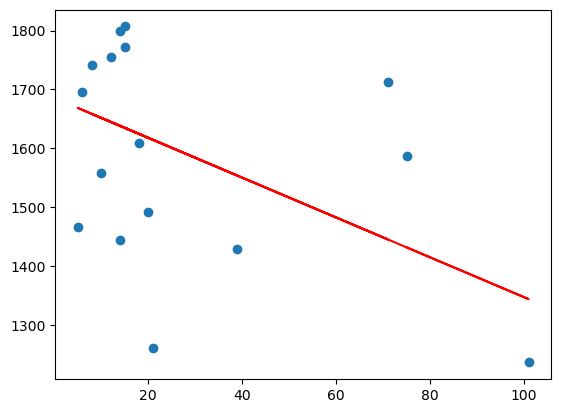

In [77]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

**Вывод:** построено уравнение регрессии следующего вида:

**y = -3.385019 * x + 1685.5141389051855**

#### Рассчитываем коэффициент детерминации

In [78]:
R2 = metrics.r2_score(y_test, y_pred)
print(f'R2: {R2}')

R2: 0.1209766752489767


**Выводы:**
- Значение коэффициента детерминации говорит о низком качестве построенной нами регрессионной модели.
- Это может быть обусловлено малым количеством значений.

#### Выводим график остатков

<Axes: xlabel='mortality', ylabel='Count'>

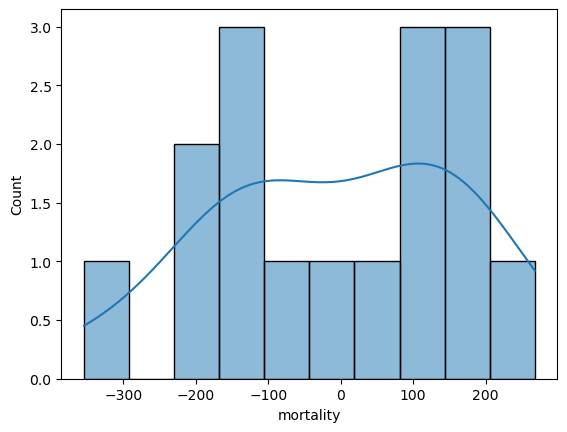

In [81]:
sns.histplot((y_test - y_pred), kde=True, bins=10)

**Вывод:** Распределение ошибок далеко от нормального (ближе к бимодальному), что подтверждает низкую прогностическую ценность модели.

## Задание 2.
### **Гипотеза:** зависимость среднегодовой смертности от жесткости воды характерна в равной мере как для северных городов, так и для южных

#### Разделим данные на две группы в звисимости от расположения городов

In [85]:
ndf = df.loc[df.location == 'North']
sdf = df.loc[df.location == 'South']

<Axes: xlabel='mortality', ylabel='Count'>

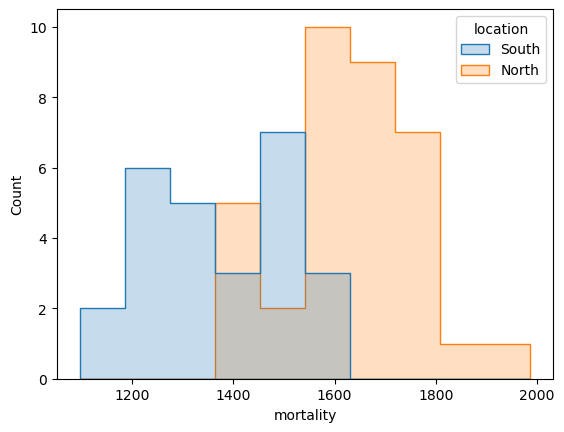

In [49]:
sns.histplot(df, x='mortality', hue='location', bins=10, element='step')

<Axes: xlabel='hardness', ylabel='Count'>

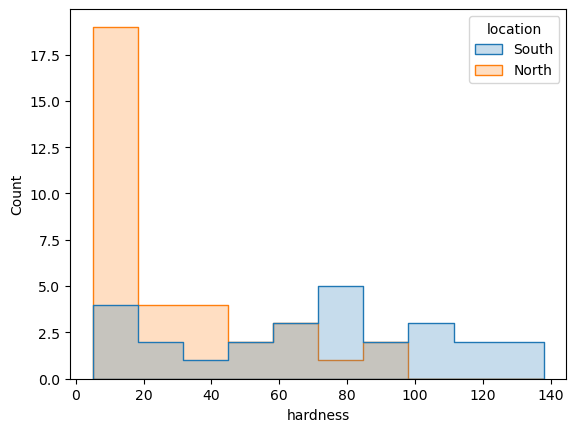

In [50]:
sns.histplot(df, x='hardness', hue='location', bins=10, element='step')

**Вывод:** Визуально в северных городах выше смертность и ниже концентрация кальция в воде, а в южных - наоборот.

#### Изучим связь между смертностью и концентрацией кальция в воде в северных городах

<Axes: xlabel='hardness', ylabel='mortality'>

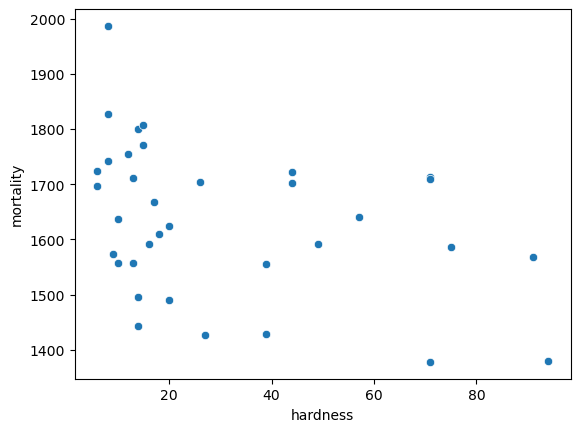

In [97]:
# строим график рассеяния
sns.scatterplot(data=ndf, x='hardness', y='mortality')

In [98]:
# определяем коэффициент корреляции Спирмена
ndf[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [99]:
# Строим модель регрессии
X = ndf[['hardness']]
y = ndf['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
lm.coef_

array([-1.43465962])

In [96]:
lm.intercept_

1691.6100464419926

In [101]:
# делаем прогноз
y_pred = lm.predict(X_test)

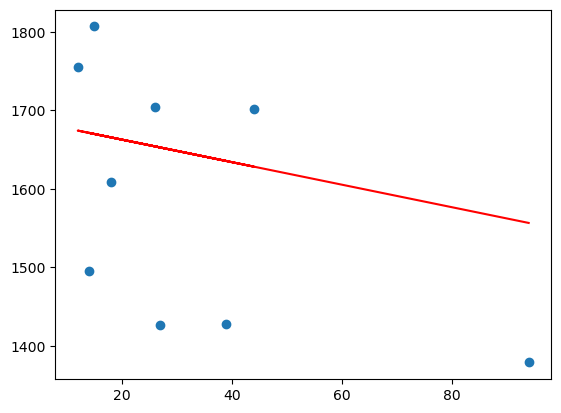

In [102]:
# визуально оцениваем качество модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [103]:
# рассчитываем коэффициент детерминации
R2 = metrics.r2_score(y_test, y_pred)
print(f'R2: {R2}')

R2: 0.06455047887710597


<Axes: xlabel='mortality', ylabel='Count'>

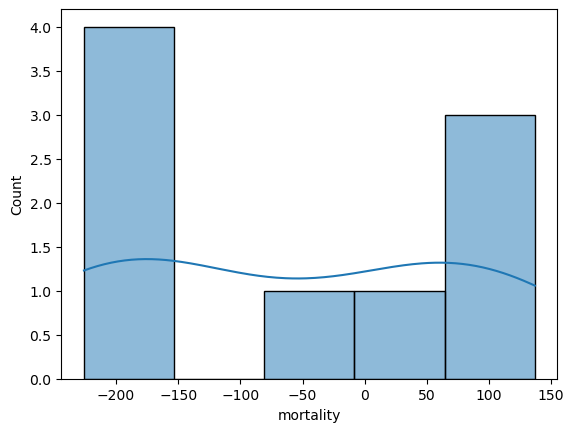

In [104]:
sns.histplot((y_test - y_pred), kde=True)

#### Изучим связь между смертностью и концентрацией кальция в воде в южных городах

<Axes: xlabel='hardness', ylabel='mortality'>

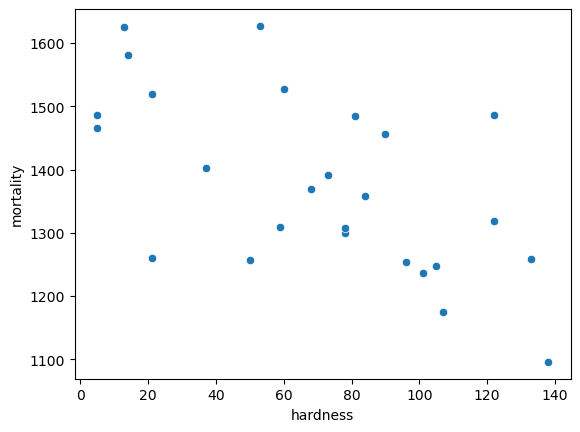

In [87]:
sns.scatterplot(data=sdf, x='hardness', y='mortality')

In [91]:
sdf[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [105]:
# Строим модель регрессии
X = sdf[['hardness']]
y = sdf['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [106]:
lm.coef_

array([-2.0491368])

In [107]:
lm.intercept_

1548.6890340987838

In [108]:
# Делаем прогноз
y_pred = lm.predict(X_test)

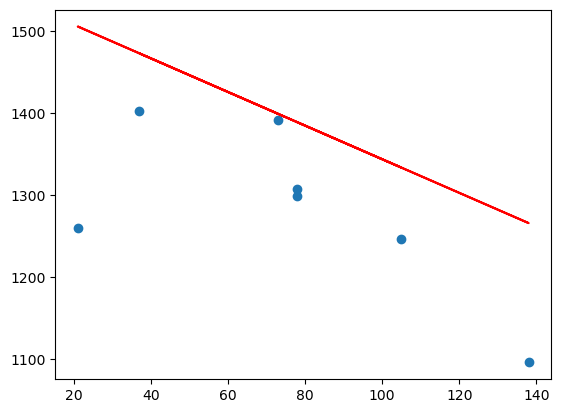

In [109]:
# Визуально оцениваем качество модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [110]:
# Рассчитываем коэффициент детерминации
R2 = metrics.r2_score(y_test, y_pred)
print(f'R2: {R2}')

R2: -0.8326016503130096


<Axes: xlabel='mortality', ylabel='Count'>

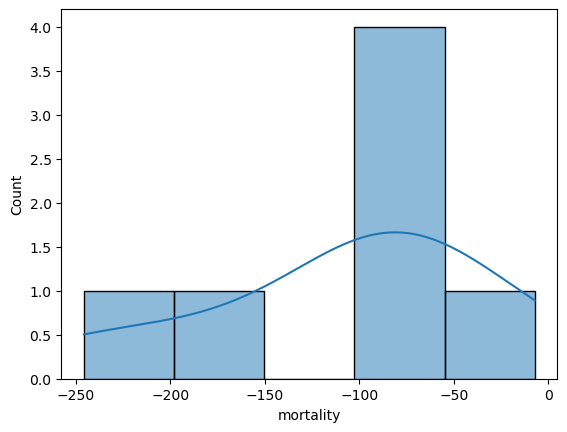

In [111]:
# Визуализируем ошибки
sns.histplot((y_test - y_pred), kde=True)

#### Выводы:
- В южных городах имеется более сильная отрицательная корреляционная связь между уровнем смертности и концентрацией кальция в воде.
- Построенная по значениям южных городов модель регрессии показала удовлетворительные прогностические результаты на контрольной выборке.
- Результаты исследования не доказывают прямого влияния концентрации кальция на смертность. Требуется проведение дополнительных исследований (поиск других факторов). Возможно, что связь между этими признаками случайна. 